In [391]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from geopy.distance import vincenty

pd.set_option('display.max_columns', None)

In [99]:
air_raw = pd.read_csv('listings.csv.gz')

/Users/brysonsicotte/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [105]:
# -----air_raw initial cleaning-----

In [106]:
# Convert air_raw['price'] from a string to float

price_list = []

air_raw['price'] = air_raw['price'].str.replace(',','')

for index, row in air_raw.iterrows():
    price_list.append(float(row['price'].strip('$')))
    
air_raw['price'] = price_list

In [108]:
# Create column for the distance to the city-center in miles, as the crow flies

# First create a column combining 'latitude' and 'longitude' columns into one, resulting in (lat, long) tuples 
lat_long_list = []

for index, row in air_raw.iterrows():
    lat_long_list.append((air_raw['latitude'][index], air_raw['longitude'][index]))

air_raw['lat_long'] = lat_long_list


# Second create a distnce_to_city_center column from the 'lat_long' column
city_center = (52.3600, 4.8852)

distance_to_city_center_list = []

for index, row in air_raw.iterrows():
    distance_to_city_center_list.append(vincenty(city_center, air_raw['lat_long'][index]).miles)
    
air_raw['distance_to_city_center'] = distance_to_city_center_list

/Users/brysonsicotte/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.


In [222]:
air_raw.to_csv('air_raw.csv')

In [ ]:
# -----end of initial cleaning for air_raw-----

In [ ]:
# Filter 'price' outliers, and create a 'small', 'medium', and 'large' version

In [112]:
air_raw_small = air_raw[(air_raw['price'] < 399) & (air_raw['price'] > 20)]

In [114]:
air_raw_medium = air_raw[(air_raw['price'] < 750) & (air_raw['price'] > 20)]

In [116]:
air_raw_large = air_raw[(air_raw['price'] < 999) & (air_raw['price'] > 20)]

In [ ]:
# Create a 'base' dataframe with just the basic columns

In [235]:
air_base3_l = air_raw_large[['accommodates','bedrooms','bathrooms','beds','distance_to_city_center','price']]
air_base3_l.head(3)

,accommodates,bedrooms,bathrooms,beds,distance_to_city_center,price
0,2,1.0,1.5,2.0,2.412697,59.0
1,2,1.0,1.0,1.0,0.498482,80.0
2,3,1.0,1.0,1.0,0.908770,125.0


In [236]:
air_base3_l.to_csv('airbase3_l.csv')

In [ ]:
# Create a dataframe with amenities boolean columns

In [257]:
amenity_list_full = []

for line in air_raw_large['amenities'].str.split(','):
    for item in line:
        amenity_list_full.append(item)

amenity_list_full = [char.replace('{', '') for char in amenity_list_full]
amenity_list_full = [char.replace('}', '') for char in amenity_list_full]
amenity_list_full = [char.replace('"', '') for char in amenity_list_full]

amenity_list_unique = set(amenity_list_full)

In [258]:
len(amenity_list_full)

398697

In [259]:
len(set(amenity_list_full))

124

In [260]:
air_amenities = air_base3_l.copy(deep=True)

In [261]:
amenity_list = [
    'Indoor fireplace',
    'Long term stays allowed',
    'Dishwasher',
    'Washer',
    'Private entrance',
    'TV',
    'Pets allowed',
    'Hot tub',
    'Beachfront',
    'Bathtub',
    'Patio or balcony',
    'Waterfront',
    'Cable TV (or Satellite TV in US)',
    'Family/kid friendly'
]

In [262]:
# Create a boolean column for each of the 15 amenities
for amenity in amenity_list:
    air_amenities[amenity] = air_raw_large['amenities'].str.contains(amenity)

/Users/brysonsicotte/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


In [263]:
# Format the column headers
formatted_amenity_cols = [
'accommodates','bedrooms','bathrooms','beds','distance_to_city_center','price',
'indoor_fireplace','long_term_stays_allowed','dishwasher','washer','private_entrance',
'tv','pets_allowed','hot_tub','beachfront','bathtub','patio_or_balcony','waterfront',
'cable_tv','kid_friendly'
]

air_amenities.columns = formatted_amenity_cols

In [264]:
# Move 'price' to the end
air_amenities = air_amenities [[
 'accommodates',
 'bedrooms',
 'bathrooms',
 'beds',
 'distance_to_city_center',
 'indoor_fireplace',
 'long_term_stays_allowed',
 'dishwasher',
 'washer',
 'private_entrance',
 'tv',
 'pets_allowed',
 'hot_tub',
 'beachfront',
 'bathtub',
 'patio_or_balcony',
 'waterfront',
 'cable_tv',
 'kid_friendly',
 'price'
]]

In [265]:
air_amenities.head(3)

,accommodates,bedrooms,bathrooms,beds,distance_to_city_center,indoor_fireplace,long_term_stays_allowed,dishwasher,washer,private_entrance,tv,pets_allowed,hot_tub,beachfront,bathtub,patio_or_balcony,waterfront,cable_tv,kid_friendly,price
0,2,1.0,1.5,2.0,2.412697,False,False,False,True,True,False,False,False,False,False,False,False,False,False,59.0
1,2,1.0,1.0,1.0,0.498482,False,True,False,False,False,True,False,False,False,False,False,False,False,False,80.0
2,3,1.0,1.0,1.0,0.908770,True,False,False,True,False,True,False,False,False,False,False,False,False,True,125.0


In [266]:
air_amenities.to_csv('air_amenities_l.csv')

In [ ]:
# Create dataframe for neighborhood booleans

In [285]:
air_hood_l = air_base3_l.copy(deep=True)

In [286]:
# create a list of all unique neighborhoods
neighborhood_list_full = []

for row in air_raw_large['neighbourhood']:
    neighborhood_list_full.append(row)

neighborhood_list_unique = list(set(neighborhood_list_full))

In [287]:
# To ensure all elements are of type str (incl. nan)
neighborhood_list_unique = list(map(str, neighborhood_list_unique))

In [288]:
for hood in neighborhood_list_unique:
    air_hood_l[hood] = air_raw_large['neighbourhood'].str.contains(hood)

In [289]:
# Move 'price' to the end
air_hood_l = air_hood_l[[
 'accommodates',
 'bedrooms',
 'bathrooms',
 'beds',
 'distance_to_city_center',
 'Jordaan',
 'nan',
 'Oostelijke Eilanden en Kadijken',
 'Weesperbuurt en Plantage',
 'Museumkwartier',
 'Tuindorp Nieuwendam',
 'Tuindorp Buiksloot',
 'Banne Buiksloot',
 'Slotermeer-Zuidwest',
 'Oud-West',
 'Osdorp',
 'Stadionbuurt',
 'Grachtengordel',
 'Buikslotermeer',
 'Westelijke Eilanden',
 'Oost',
 'Spaarndammer en Zeeheldenbuurt',
 'Slotervaart',
 'Buitenveldert-Oost',
 'Nieuwendammerham',
 'Slotermeer-Noordoost',
 'Watergraafsmeer',
 'Tuindorp Oostzaan',
 'Nieuwendammerdijk en Buiksloterdijk',
 'Buitenveldert-West',
 'De Wallen',
 'Nieuwmarkt en Lastage',
 'Amsterdam Centrum',
 'Oosterparkbuurt',
 'Oostzanerwerf',
 'Zeeburg',
 'Landelijk Noord',
 'Overtoomse Veld',
 'IJplein en Vogelbuurt',
 'Kadoelen',
 'Frederik Hendrikbuurt',
 'Volewijck',
 'Indische Buurt',
 'Oud-Zuid',
 'Hoofddorppleinbuurt',
 'De Pijp',
 'Rivierenbuurt',
 'Buiksloterham',
 'Nieuwendam-Noord',
 'Bos en Lommer',
 'price'
]]

In [290]:
air_hood_l.head(3)

,accommodates,bedrooms,bathrooms,beds,distance_to_city_center,Jordaan,nan,Oostelijke Eilanden en Kadijken,Weesperbuurt en Plantage,Museumkwartier,Tuindorp Nieuwendam,Tuindorp Buiksloot,Banne Buiksloot,Slotermeer-Zuidwest,Oud-West,Osdorp,Stadionbuurt,Grachtengordel,Buikslotermeer,Westelijke Eilanden,Oost,Spaarndammer en Zeeheldenbuurt,Slotervaart,Buitenveldert-Oost,Nieuwendammerham,Slotermeer-Noordoost,Watergraafsmeer,Tuindorp Oostzaan,Nieuwendammerdijk en Buiksloterdijk,Buitenveldert-West,De Wallen,Nieuwmarkt en Lastage,Amsterdam Centrum,Oosterparkbuurt,Oostzanerwerf,Zeeburg,Landelijk Noord,Overtoomse Veld,IJplein en Vogelbuurt,Kadoelen,Frederik Hendrikbuurt,Volewijck,Indische Buurt,Oud-Zuid,Hoofddorppleinbuurt,De Pijp,Rivierenbuurt,Buiksloterham,Nieuwendam-Noord,Bos en Lommer,price
0,2,1.0,1.5,2.0,2.412697,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,59.0
1,2,1.0,1.0,1.0,0.498482,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,80.0
2,3,1.0,1.0,1.0,0.908770,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,125.0


In [291]:
air_hood_m.to_csv('air_hood_m.csv')

In [308]:
# Create dataframe with alternative 'neighborhood' method
    # Using 'neighborhood_overview' column
    # Using a list of neighborhoods from wikipedia, find rows where each neighborhood is found in
    #the 'neighborhood overview' column

air_hood_alt_l = air_raw_large.copy(deep=True)

In [309]:
air_hood_alt_l = air_hood_alt_l[air_hood_alt_l['neighborhood_overview'].notnull()]

In [310]:
hood_wiki = [
    'Admiralenbuurt',
    'Amsteldorp',
    'Oud-West',
    'Oud-Zuid',
    'Science Park',
    'Apollobuurt',
    'Betondorp',
    'Bijlmermeer',
    'Binnenstad',
    'Bos en Lommer',
    'Buiksloot',
    'Buikslotermeer',
    'Buitenveldert',
    'Bullewijk',
    'Nieuwe Zijde',
    'Chassébuurt',
    'Cruquiuseiland',
    'Czaar Peterbuurt',
    'Dapperbuurt',
    'De Aker',
    'De Pijp',
    'De Wallen',
    'Diamantbuurt ',
    'Duivelseiland',
    'Eastern Docklands',
    'Eendracht ',
    'Floradorp',
    'Frederik Hendrikbuurt',
    'Gaasperdam',
    'Geuzenveld',
    'Gouden Reael',
    'Grachtengordel',
    'Haarlemmerbuurt',
    'Hoofddorppleinbuurt',
    'Houthaven',
    'IJburg',
    'Indische Buurt',
    'Java-eiland',
    'Jodenbuurt',
    'Jordaan',
    'Kadijken',
    'Kadoelen',
    'Kinkerbuurt',
    'KNSM',
    'Kolenkit',
    'Landelijk',
    'Landlust',
    'Lastage',
    'Middelveldsche Akerpolder',
    'Molenwijk',
    'Museumkwartier',
    'NDSM',
    'Negen Straatjes',
    'Nieuw Sloten',
    'Nieuwe Pijp',
    'Nieuwendam',
    'Nieuwendammerdijk',
    'Olympisch',
    'Omval',
    'Oostelijke Eilanden',
    'Oosterdokseiland',
    'Oosterparkbuurt',
    'Oostoever',
    'Oostpoort',
    'Oostzanerwerf',
    'Osdorp',
    'Oud Osdorp',
    'Oud-Oost',
    'Oude Pijp',
    'Overhoeks',
    'Overtoombuurt',
    'Overtoomse Veld',
    'Plantage',
    'Prinses Irenebuurt',
    'Ransdorp',
    'Rieteilanden',
    'Rivierenbuurt',
    'Ruigoord',
    'Schellingwoude',
    'Schinkelbuurt',
    'Slotermeer',
    'Slotervaart',
    'Spaarndammerbuurt',
    'Staatsliedenbuurt',
    'Stadionbuurt',
    'Steigereiland',
    'Teleport',
    'Transvaalbuurt',
    'Trompbuurt',
    'Nieuwendam',
    'Oostzaan',
    'Uilenburg',
    'Venserpolder',
    'Watergraafsmeer',
    'Waterwijk',
    'Weesperzijde',
    'Westelijk Havengebied',
    'Westelijke Eilanden',
    'Westelijke Tuinsteden',
    'Westerpark',
    'Willemspark',
    'Zeeburgereiland',
    'Zeeheldenbuurt',
    'Zuidas'
]

In [311]:
for hood in hood_wiki:
    air_hood_alt_l[hood] = air_hood_alt_l['neighborhood_overview'].str.contains(hood)    

In [312]:
# keep only the necessary columns, place 'price' at the end
air_hood_alt_l = air_hood_alt_l[[
    'accommodates','bedrooms','bathrooms','beds','distance_to_city_center',
    'Admiralenbuurt',
    'Amsteldorp',
    'Oud-West',
    'Oud-Zuid',
    'Science Park',
    'Apollobuurt',
    'Betondorp',
    'Bijlmermeer',
    'Binnenstad',
    'Bos en Lommer',
    'Buiksloot',
    'Buikslotermeer',
    'Buitenveldert',
    'Bullewijk',
    'Nieuwe Zijde',
    'Chassébuurt',
    'Cruquiuseiland',
    'Czaar Peterbuurt',
    'Dapperbuurt',
    'De Aker',
    'De Pijp',
    'De Wallen',
    'Diamantbuurt ',
    'Duivelseiland',
    'Eastern Docklands',
    'Eendracht ',
    'Floradorp',
    'Frederik Hendrikbuurt',
    'Gaasperdam',
    'Geuzenveld',
    'Gouden Reael',
    'Grachtengordel',
    'Haarlemmerbuurt',
    'Hoofddorppleinbuurt',
    'Houthaven',
    'IJburg',
    'Indische Buurt',
    'Java-eiland',
    'Jodenbuurt',
    'Jordaan',
    'Kadijken',
    'Kadoelen',
    'Kinkerbuurt',
    'KNSM',
    'Kolenkit',
    'Landelijk',
    'Landlust',
    'Lastage',
    'Middelveldsche Akerpolder',
    'Molenwijk',
    'Museumkwartier',
    'NDSM',
    'Negen Straatjes',
    'Nieuw Sloten',
    'Nieuwe Pijp',
    'Nieuwendam',
    'Nieuwendammerdijk',
    'Olympisch',
    'Omval',
    'Oostelijke Eilanden',
    'Oosterdokseiland',
    'Oosterparkbuurt',
    'Oostoever',
    'Oostpoort',
    'Oostzanerwerf',
    'Osdorp',
    'Oud Osdorp',
    'Oud-Oost',
    'Oude Pijp',
    'Overhoeks',
    'Overtoombuurt',
    'Overtoomse Veld',
    'Plantage',
    'Prinses Irenebuurt',
    'Ransdorp',
    'Rieteilanden',
    'Rivierenbuurt',
    'Ruigoord',
    'Schellingwoude',
    'Schinkelbuurt',
    'Slotermeer',
    'Slotervaart',
    'Spaarndammerbuurt',
    'Staatsliedenbuurt',
    'Stadionbuurt',
    'Steigereiland',
    'Teleport',
    'Transvaalbuurt',
    'Trompbuurt',
    'Nieuwendam',
    'Oostzaan',
    'Uilenburg',
    'Venserpolder',
    'Watergraafsmeer',
    'Waterwijk',
    'Weesperzijde',
    'Westelijk Havengebied',
    'Westelijke Eilanden',
    'Westelijke Tuinsteden',
    'Westerpark',
    'Willemspark',
    'Zeeburgereiland',
    'Zeeheldenbuurt',
    'Zuidas',
    'price'
]]

In [313]:
air_hood_alt_l.to_csv('air_hood_alt_l.csv')

In [ ]:
# EDA

In [316]:
air_base3.head()

,accommodates,bedrooms,bathrooms,beds,distance_to_city_center,price
0,2,1.0,1.5,2.0,2.412697,59.0
1,2,1.0,1.0,1.0,0.498482,80.0
2,3,1.0,1.0,1.0,0.908770,125.0
3,2,1.0,1.0,1.0,1.870978,150.0
4,2,1.0,1.0,2.0,1.587564,65.0


Text(0.5, 1.0, 'Airbnb Prices in Amsterdam (outliers removed)')

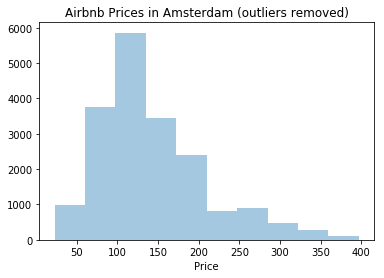

In [390]:
sns.distplot(air_base3_s['price'], kde=False, axlabel='Price', bins=10).set_title('Airbnb Prices in Amsterdam (outliers removed)')

Text(0, 0.5, 'Price')

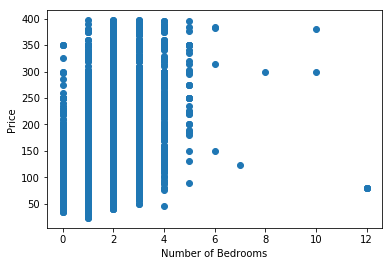

In [404]:
plt.scatter(air_base3_s['bedrooms'], air_base3_s['price'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')

In [407]:
air_raw['square_feet'].dropna().corr(air_raw['price'])

0.32084361398762606

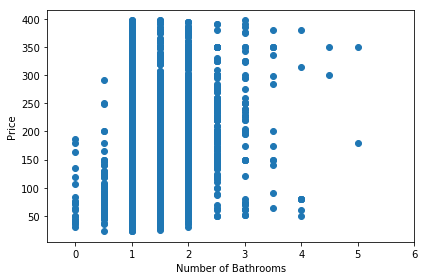

In [330]:
plt.scatter(air_base3_s['bathrooms'], air_base3_s['price'])
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.xlim(-0.5,6)
plt.tight_layout()

Text(0, 0.5, 'Price')

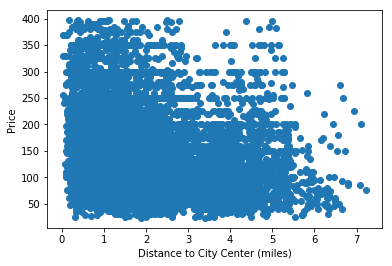

In [333]:
plt.scatter(air_base3_s['distance_to_city_center'], air_base3_s['price'])
plt.xlabel('Distance to City Center (miles)')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

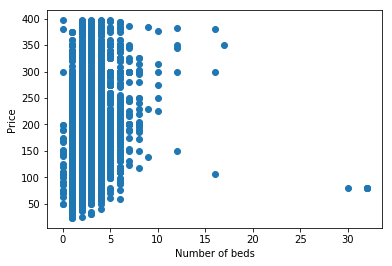

In [355]:
plt.scatter(air_base3_s['beds'], air_base3_s['price'])
plt.xlabel('Number of beds')
plt.ylabel('Price')

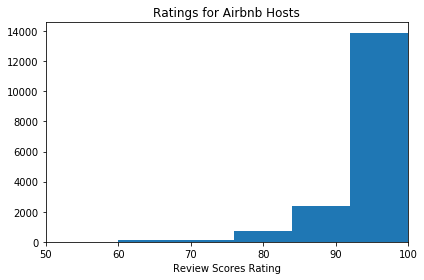

In [361]:
plt.hist(air_raw['review_scores_rating'])
plt.title('Ratings for Airbnb Hosts')
plt.xlabel('Review Scores Rating')
plt.xlim(50,100)
plt.tight_layout()

Text(0, 0.5, 'Price')

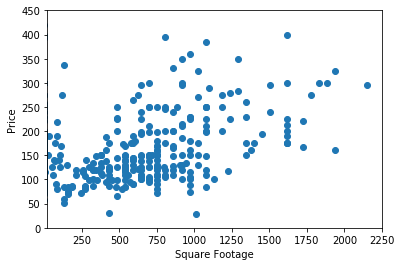

In [372]:
plt.scatter(air_raw['square_feet'], air_raw['price'])
plt.xlim(20,2250)
plt.ylim(0,450)
plt.xlabel('Square Footage')
plt.ylabel('Price')

In [384]:
np.mean(air_base3_s['price'])

141.59034751064613

In [385]:
np.median(air_base3_s['price'])

125.0

In [386]:
np.std(air_base3_s['price'])

64.9468228233521